In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [0]:
df = pd.read_csv('College.csv')

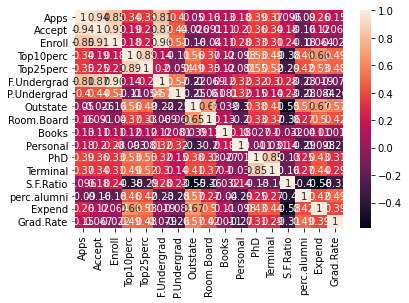

In [5]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [0]:
X = df.iloc[:, 1:].values
y = df.iloc[:,0].values

# X, y = df.iloc[:, 1:].values, df.iloc[:,0].values

In [7]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
df['Private'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [0]:
target_enc = LabelEncoder()
y = target_enc.fit_transform(y)

In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
target_enc.classes_

array(['No', 'Yes'], dtype=object)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Let's try Linear SVC first

In [0]:
from sklearn.svm import SVC
linear_SVC = SVC(kernel="linear")

In [15]:
linear_SVC.fit(X_train, y_train)
linear_SVC.score(X_test, y_test)

0.9358974358974359

In [16]:
# confusion matrix

from sklearn.metrics import confusion_matrix

linear_preds = linear_SVC.predict(X_test)
print(confusion_matrix(linear_preds, y_test))

[[ 35   6]
 [  4 111]]


## Let's do rbf SVC now

In [0]:
rbf_SVC = SVC()

In [18]:
rbf_SVC.fit(X_train, y_train)
rbf_SVC.score(X_test, y_test)

0.9230769230769231

In [19]:
# confusion matrix

rbf_preds = rbf_SVC.predict(X_test)
print(confusion_matrix(rbf_preds, y_test))

[[ 33   6]
 [  6 111]]


# Let's try with some preprocessing

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
rbf_SVC_2 = SVC()
rbf_SVC_2.fit(X_train_scaled, y_train)
rbf_SVC_2.score(X_test_scaled, y_test)

0.9423076923076923

In [24]:
linear_SVC_2 = SVC(kernel="linear")
linear_SVC_2.fit(X_train_scaled, y_train)
linear_SVC_2.score(X_test_scaled, y_test)

0.9551282051282052

## GRIDSEARCH!!!

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
kernel_options = ('linear', 'rbf', 'sigmoid')

In [0]:
param_grid = dict(gamma = gamma_range, C=C_range, kernel = kernel_options)

In [0]:
grid = GridSearchCV(SVC(), param_grid=param_grid)

In [0]:
grid.fit(X_train_scaled, y_train)

In [0]:
grid.best_params_

In [0]:
from sklearn.decomposition import PCA